In [39]:
# this walk-through was adapted from the following two tutorials, check them out for more info:
# https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
# https://towardsdatascience.com/exploring-classifiers-with-python-scikit-learn-iris-dataset-2bcb490d2e1b


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# import warnings
# warnings.filterwarnings('ignore', category=FutureWarning, append=True)

In [40]:
games = pd.read_csv("leagueVictoryPredictor/data/processed_games_shortened.csv")
games.head()

,index,p1.championId,p2.championId,p3.championId,p4.championId,p5.championId,p6.championId,p7.championId,p8.championId,p9.championId,...,p8.xpDiffPerMinDeltas,p9.xpDiffPerMinDeltas,p10.xpDiffPerMinDeltas,t1.goldPerMinDeltas,t2.goldPerMinDeltas,t1.firstBlood,t2.firstBlood,t1.firstRiftHerald,t2.firstRiftHerald,t1.win
0,0,79,147,202,10,555,84,57,246,145,...,-115.06,-115.06,-115.06,1500.3,1029.3,0,1,0,0,1
1,1,202,121,4,267,8,266,145,236,28,...,-99.20,150.20,27.55,1424.9,1433.0,1,0,1,0,1
2,2,412,114,145,3,64,516,777,89,20,...,4.35,6.70,4.35,1329.2,1345.4,1,0,0,1,1
3,3,246,126,134,81,101,84,412,62,2,...,-53.30,49.60,-32.20,1391.4,1212.3,1,0,0,0,0
4,4,163,62,80,30,238,134,20,202,24,...,-1.10,-125.90,-1.10,1605.5,1531.4,0,1,1,0,0


In [48]:
games.shape
# games.describe()

,index,p1.championId,p2.championId,p3.championId,p4.championId,p5.championId,p6.championId,p7.championId,p8.championId,p9.championId,...,p8.xpDiffPerMinDeltas,p9.xpDiffPerMinDeltas,p10.xpDiffPerMinDeltas,t1.goldPerMinDeltas,t2.goldPerMinDeltas,t1.firstBlood,t2.firstBlood,t1.firstRiftHerald,t2.firstRiftHerald,t1.win
count,17501.000000,17501.000000,17501.000000,17501.000000,17501.000000,17501.000000,17501.000000,17501.000000,17501.000000,17501.000000,...,17501.000000,17501.000000,17501.000000,17501.000000,17501.000000,17501.000000,17501.000000,17501.000000,17501.000000,17501.000000
mean,8750.000000,161.900691,164.288041,163.601166,164.941718,162.413348,161.977658,167.598194,164.847494,166.451346,...,-0.558008,0.190956,-0.286632,1405.769499,1402.904131,0.503857,0.493972,0.538426,0.398720,0.498372
std,5052.247866,181.060300,182.740997,182.289694,182.799309,178.640146,181.514348,185.072868,183.357350,184.482520,...,55.722622,56.270982,56.519175,201.857832,201.553284,0.499999,0.499978,0.498535,0.489649,0.500012
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,-419.800000,-501.000000,-297.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4375.000000,51.000000,53.000000,53.000000,54.000000,53.000000,53.000000,54.000000,53.000000,54.000000,...,-27.000000,-26.400000,-27.800000,1308.700000,1305.100000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8750.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,...,0.000000,0.000000,0.000000,1404.100000,1404.200000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,13125.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,...,25.750000,27.100000,26.600000,1513.600000,1510.900000,1.000000,1.000000,1.000000,1.000000,1.000000
max,17500.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,...,283.900000,304.700000,463.300000,2183.600000,2280.100000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
x = games.drop(['index', 't1.win'], axis=1)
y = games['t1.win']


(17501,)

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [71]:
def run(X_train, y_train, X_test, y_test, hidden=8, epochs=10, drop = False):

    model = Sequential()
    model.add(Dense(hidden))
    model.add(Flatten())
    model.add(Dense(hidden, activation='selu'))
    if drop==True:
        model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss="binary_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])
    history = model.fit(x=X_train,y=y_train,
                        validation_data = (X_test, y_test),
                        batch_size=16,epochs=epochs,
                        verbose=1)
        
    predicted_probabilities = model.predict(X_train)
    predicted_probabilities = np.rint(predicted_probabilities)
    acc = 100. * accuracy_score(y_train, predicted_probabilities)
    print("Accuracy on train set: {:.2f}%".format(acc))

    predicted_probabilities = model.predict(X_test)
    predicted_probabilities = np.rint(predicted_probabilities)
    acc = 100. * accuracy_score(y_test, predicted_probabilities)
    
    print("Accuracy on test set: {:.2f}%".format(acc))
    print(confusion_matrix(y_test, predicted_probabilities))
    model.summary()

    return model, history

def confusion_mat(model):
    y_predicted = model.predict(x_test) > 0.5
    mat = confusion_matrix(y_test, y_predicted)
    labels = ['win', 'loss']
    
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.show()

def graph(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()


Epoch 1/10
875/875 [==============================] - 5s 5ms/step - loss: 6.9157 - accuracy: 0.6486 - val_loss: 1.1724 - val_accuracy: 0.7058
Epoch 2/10
875/875 [==============================] - 4s 4ms/step - loss: 1.2735 - accuracy: 0.6458 - val_loss: 0.7524 - val_accuracy: 0.6964
Epoch 3/10
875/875 [==============================] - 4s 4ms/step - loss: 1.1892 - accuracy: 0.6436 - val_loss: 0.7222 - val_accuracy: 0.7007
Epoch 4/10
875/875 [==============================] - 4s 4ms/step - loss: 1.1098 - accuracy: 0.6451 - val_loss: 0.9465 - val_accuracy: 0.5870
Epoch 5/10
875/875 [==============================] - 4s 4ms/step - loss: 1.1846 - accuracy: 0.6476 - val_loss: 1.2941 - val_accuracy: 0.6532
Epoch 6/10
875/875 [==============================] - 4s 4ms/step - loss: 1.0712 - accuracy: 0.6504 - val_loss: 0.8643 - val_accuracy: 0.6784
Epoch 7/10
875/875 [==============================] - 4s 4ms/step - loss: 0.8937 - accuracy: 0.6559 - val_loss: 1.2979 - val_accuracy: 0.5501
Epoch 

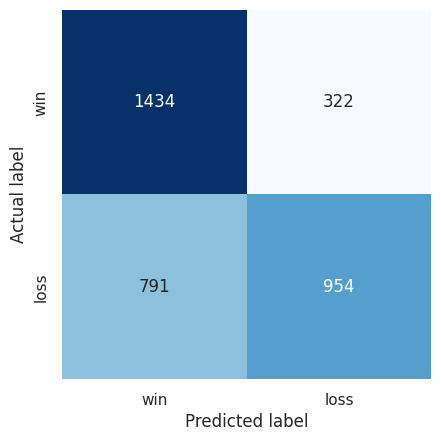

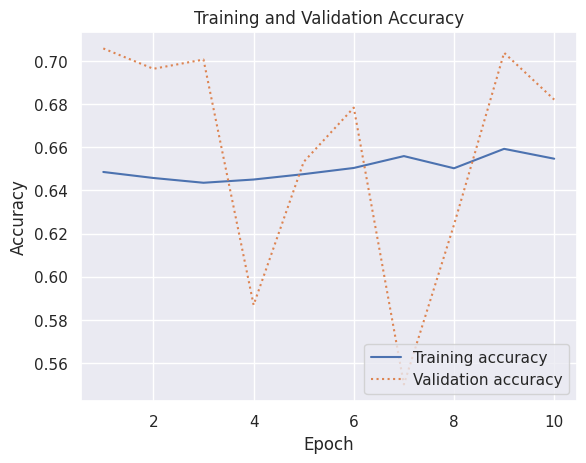

In [72]:
model, hist = run(x_train, y_train, x_test, y_test, hidden=16, epochs=10)
confusion_mat(model)
graph(hist)

Epoch 1/25
875/875 [==============================] - 5s 4ms/step - loss: 6.3654 - accuracy: 0.6380 - val_loss: 1.2907 - val_accuracy: 0.6421
Epoch 2/25
875/875 [==============================] - 4s 4ms/step - loss: 1.2676 - accuracy: 0.6436 - val_loss: 1.8643 - val_accuracy: 0.5598
Epoch 3/25
875/875 [==============================] - 4s 4ms/step - loss: 1.2249 - accuracy: 0.6428 - val_loss: 1.0274 - val_accuracy: 0.7061
Epoch 4/25
875/875 [==============================] - 4s 4ms/step - loss: 1.1627 - accuracy: 0.6449 - val_loss: 1.1806 - val_accuracy: 0.6738
Epoch 5/25
875/875 [==============================] - 4s 5ms/step - loss: 1.2281 - accuracy: 0.6394 - val_loss: 1.6964 - val_accuracy: 0.5981
Epoch 6/25
875/875 [==============================] - 4s 4ms/step - loss: 1.1418 - accuracy: 0.6462 - val_loss: 0.7120 - val_accuracy: 0.7118
Epoch 7/25
875/875 [==============================] - 4s 4ms/step - loss: 1.0023 - accuracy: 0.6493 - val_loss: 0.8033 - val_accuracy: 0.6844
Epoch 

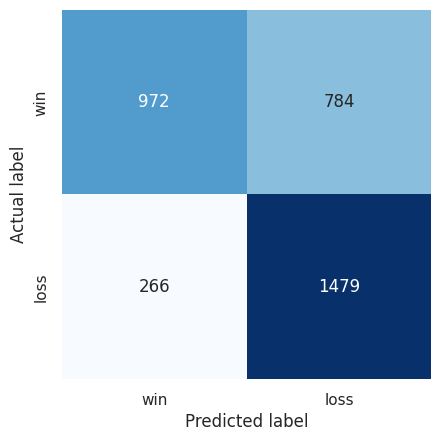

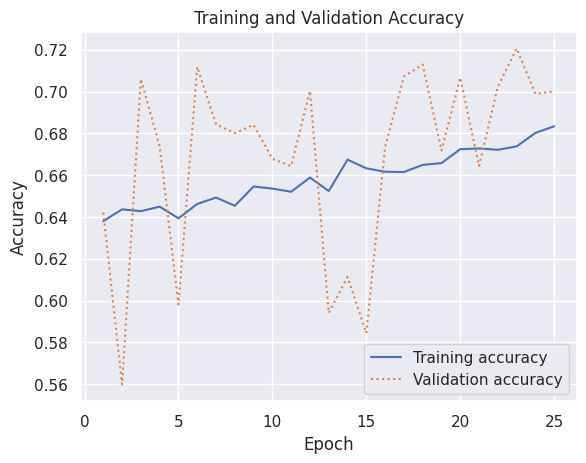

In [73]:
model, hist = run(x_train, y_train, x_test, y_test, hidden=16, epochs=25)
confusion_mat(model)
graph(hist)

Epoch 1/10


875/875 [==============================] - 5s 4ms/step - loss: 12.3881 - accuracy: 0.5449 - val_loss: 1.1361 - val_accuracy: 0.6118
Epoch 2/10
875/875 [==============================] - 4s 4ms/step - loss: 1.3207 - accuracy: 0.5397 - val_loss: 0.8451 - val_accuracy: 0.6592
Epoch 3/10
875/875 [==============================] - 4s 4ms/step - loss: 1.0605 - accuracy: 0.5360 - val_loss: 0.7551 - val_accuracy: 0.6821
Epoch 4/10
875/875 [==============================] - 4s 4ms/step - loss: 0.9240 - accuracy: 0.5444 - val_loss: 0.6738 - val_accuracy: 0.6761
Epoch 5/10
875/875 [==============================] - 4s 4ms/step - loss: 0.8267 - accuracy: 0.5500 - val_loss: 0.6094 - val_accuracy: 0.7032
Epoch 6/10
875/875 [==============================] - 4s 4ms/step - loss: 0.7487 - accuracy: 0.5717 - val_loss: 0.5943 - val_accuracy: 0.7149
Epoch 7/10
875/875 [==============================] - 4s 4ms/step - loss: 0.6894 - accuracy: 0.5771 - val_loss: 0.5792 - val_accuracy: 0.6969
Epoch 8/10
875/8

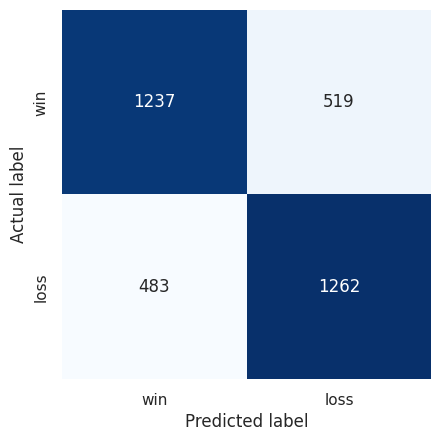

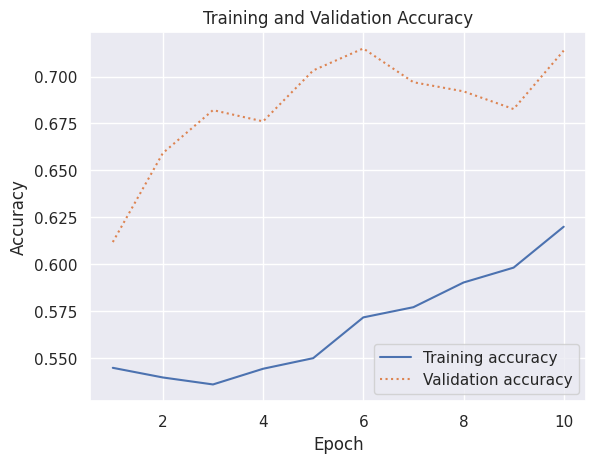

In [74]:
model, hist = run(x_train, y_train, x_test, y_test, hidden=16, drop=True)
confusion_mat(model)
graph(hist)

Epoch 1/10


875/875 [==============================] - 5s 4ms/step - loss: 20.9886 - accuracy: 0.5136 - val_loss: 0.8541 - val_accuracy: 0.5296
Epoch 2/10
875/875 [==============================] - 4s 4ms/step - loss: 0.7202 - accuracy: 0.5611 - val_loss: 0.6728 - val_accuracy: 0.5873
Epoch 3/10
875/875 [==============================] - 4s 4ms/step - loss: 0.6761 - accuracy: 0.5916 - val_loss: 0.6538 - val_accuracy: 0.6187
Epoch 4/10
875/875 [==============================] - 4s 4ms/step - loss: 0.6474 - accuracy: 0.6222 - val_loss: 0.6613 - val_accuracy: 0.6258
Epoch 5/10
875/875 [==============================] - 4s 4ms/step - loss: 0.6191 - accuracy: 0.6528 - val_loss: 0.6161 - val_accuracy: 0.6447
Epoch 6/10
875/875 [==============================] - 4s 4ms/step - loss: 0.6038 - accuracy: 0.6627 - val_loss: 0.5850 - val_accuracy: 0.6792
Epoch 7/10
875/875 [==============================] - 4s 4ms/step - loss: 0.5948 - accuracy: 0.6717 - val_loss: 0.5896 - val_accuracy: 0.6747
Epoch 8/10
875/8

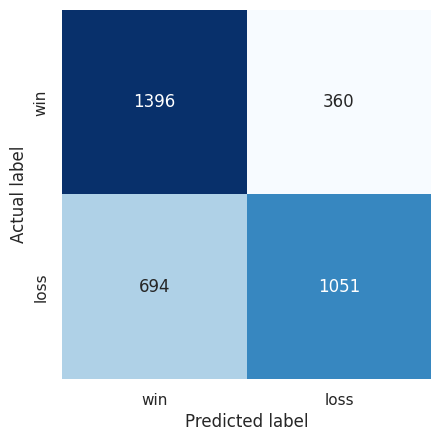

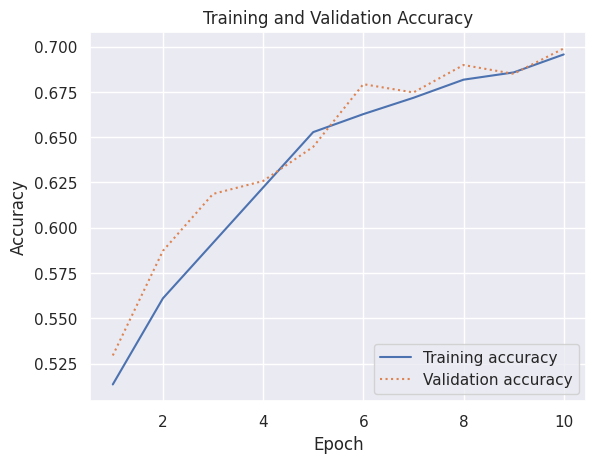

In [75]:
model, hist = run(x_train, y_train, x_test, y_test, hidden=4)
confusion_mat(model)
graph(hist)

Epoch 1/10


875/875 [==============================] - 5s 4ms/step - loss: 7.8420 - accuracy: 0.6436 - val_loss: 1.2948 - val_accuracy: 0.6672
Epoch 2/10
875/875 [==============================] - 4s 4ms/step - loss: 1.4236 - accuracy: 0.6424 - val_loss: 0.9449 - val_accuracy: 0.7084
Epoch 3/10
875/875 [==============================] - 4s 4ms/step - loss: 1.2074 - accuracy: 0.6484 - val_loss: 3.1836 - val_accuracy: 0.5213
Epoch 4/10
875/875 [==============================] - 4s 4ms/step - loss: 1.3129 - accuracy: 0.6394 - val_loss: 1.1123 - val_accuracy: 0.6261
Epoch 5/10
875/875 [==============================] - 4s 4ms/step - loss: 1.0458 - accuracy: 0.6471 - val_loss: 0.7969 - val_accuracy: 0.6995
Epoch 6/10
875/875 [==============================] - 4s 4ms/step - loss: 0.9316 - accuracy: 0.6479 - val_loss: 1.0966 - val_accuracy: 0.6518
Epoch 7/10
875/875 [==============================] - 4s 4ms/step - loss: 0.9758 - accuracy: 0.6478 - val_loss: 2.7777 - val_accuracy: 0.5370
Epoch 8/10
875/87

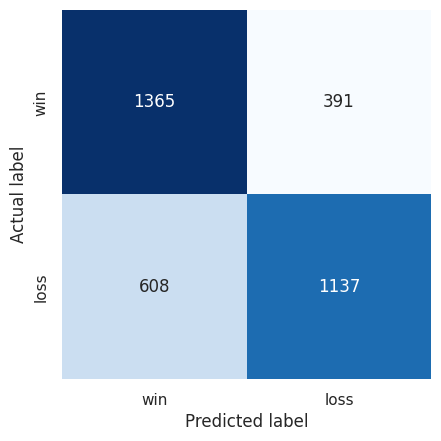

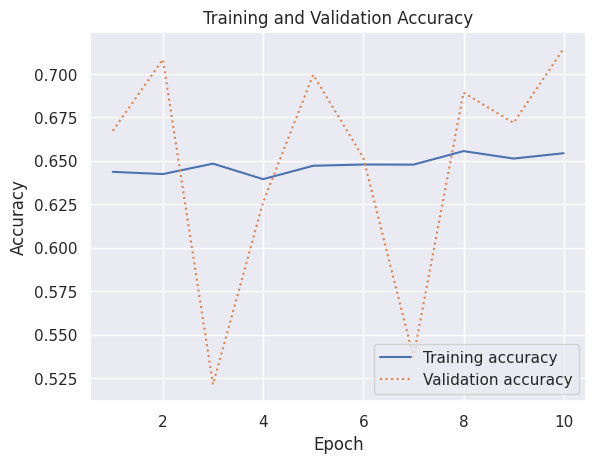

In [76]:
model, hist = run(x_train, y_train, x_test, y_test, hidden=20)
confusion_mat(model)
graph(hist)

Epoch 1/10
875/875 [==============================] - 5s 5ms/step - loss: 6.1536 - accuracy: 0.5252 - val_loss: 0.8687 - val_accuracy: 0.5210
Epoch 2/10
875/875 [==============================] - 4s 5ms/step - loss: 1.0698 - accuracy: 0.5126 - val_loss: 0.7209 - val_accuracy: 0.6324
Epoch 3/10
875/875 [==============================] - 4s 4ms/step - loss: 0.8890 - accuracy: 0.5447 - val_loss: 0.6296 - val_accuracy: 0.6924
Epoch 4/10
875/875 [==============================] - 4s 4ms/step - loss: 0.7805 - accuracy: 0.5581 - val_loss: 0.6254 - val_accuracy: 0.7104
Epoch 5/10
875/875 [==============================] - 4s 5ms/step - loss: 0.7119 - accuracy: 0.5689 - val_loss: 0.6159 - val_accuracy: 0.7147
Epoch 6/10
875/875 [==============================] - 4s 4ms/step - loss: 0.6718 - accuracy: 0.5759 - val_loss: 0.6100 - val_accuracy: 0.6989
Epoch 7/10
875/875 [==============================] - 4s 4ms/step - loss: 0.6531 - accuracy: 0.5826 - val_loss: 0.6218 - val_accuracy: 0.6621
Epoch 

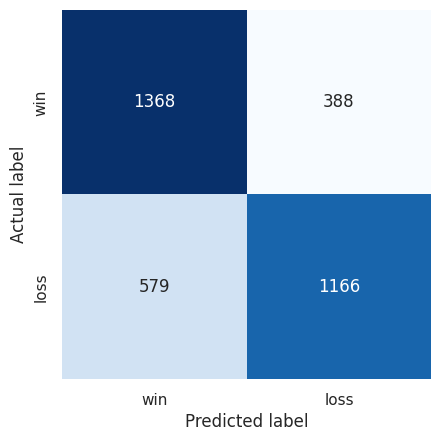

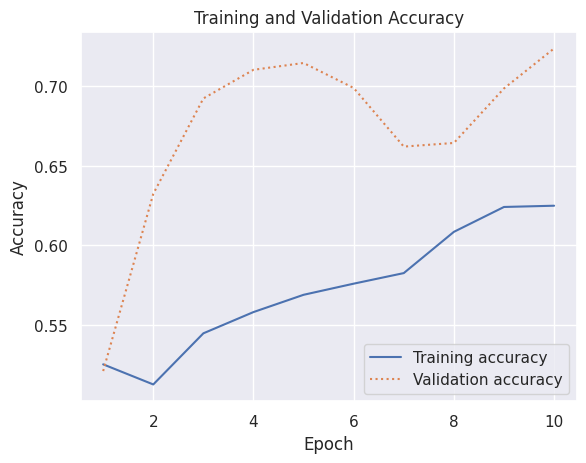

In [77]:
model, hist = run(x_train, y_train, x_test, y_test, hidden=20, drop=True)
confusion_mat(model)
graph(hist)

Epoch 1/25
875/875 [==============================] - 5s 5ms/step - loss: 11.4916 - accuracy: 0.5266 - val_loss: 0.7697 - val_accuracy: 0.5910
Epoch 2/25
875/875 [==============================] - 4s 4ms/step - loss: 1.1259 - accuracy: 0.5508 - val_loss: 0.6578 - val_accuracy: 0.6829
Epoch 3/25
875/875 [==============================] - 4s 4ms/step - loss: 0.9275 - accuracy: 0.5691 - val_loss: 0.5838 - val_accuracy: 0.7138
Epoch 4/25
875/875 [==============================] - 4s 4ms/step - loss: 0.8273 - accuracy: 0.5689 - val_loss: 0.5713 - val_accuracy: 0.7129
Epoch 5/25
875/875 [==============================] - 4s 4ms/step - loss: 0.7469 - accuracy: 0.5897 - val_loss: 0.5621 - val_accuracy: 0.7229
Epoch 6/25
875/875 [==============================] - 4s 4ms/step - loss: 0.6980 - accuracy: 0.5974 - val_loss: 0.5901 - val_accuracy: 0.7241
Epoch 7/25
875/875 [==============================] - 4s 5ms/step - loss: 0.6537 - accuracy: 0.6099 - val_loss: 0.5476 - val_accuracy: 0.7264
Epoch

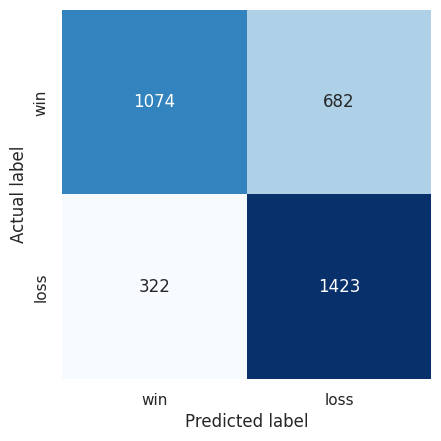

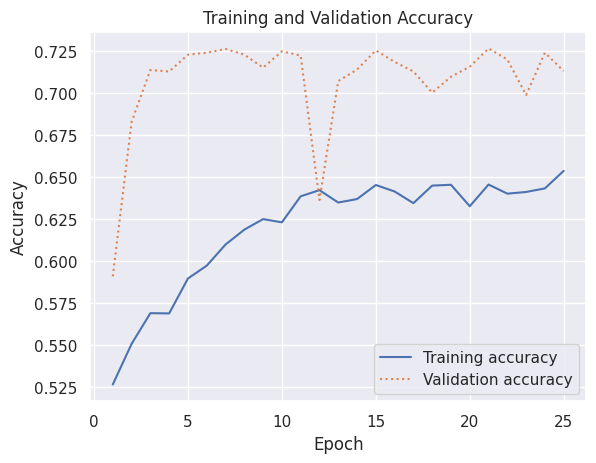

In [78]:
model, hist = run(x_train, y_train, x_test, y_test, hidden=20, drop=True, epochs=25)
confusion_mat(model)
graph(hist)

Epoch 1/10


875/875 [==============================] - 5s 5ms/step - loss: 5.7935 - accuracy: 0.5386 - val_loss: 0.7189 - val_accuracy: 0.6004
Epoch 2/10
875/875 [==============================] - 4s 4ms/step - loss: 0.8998 - accuracy: 0.5361 - val_loss: 0.6584 - val_accuracy: 0.6570
Epoch 3/10
875/875 [==============================] - 4s 5ms/step - loss: 0.8197 - accuracy: 0.5359 - val_loss: 0.6225 - val_accuracy: 0.6992
Epoch 4/10
875/875 [==============================] - 4s 4ms/step - loss: 0.7349 - accuracy: 0.5519 - val_loss: 0.6450 - val_accuracy: 0.6792
Epoch 5/10
875/875 [==============================] - 3s 4ms/step - loss: 0.6912 - accuracy: 0.5693 - val_loss: 0.6368 - val_accuracy: 0.6807
Epoch 6/10
875/875 [==============================] - 4s 4ms/step - loss: 0.6656 - accuracy: 0.5835 - val_loss: 0.6120 - val_accuracy: 0.7069
Epoch 7/10
875/875 [==============================] - 4s 4ms/step - loss: 0.6512 - accuracy: 0.6065 - val_loss: 0.6030 - val_accuracy: 0.7067
Epoch 8/10
875/87

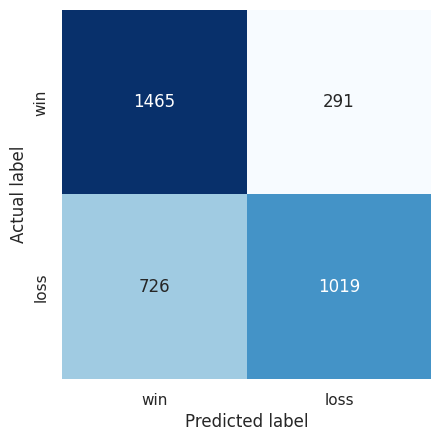

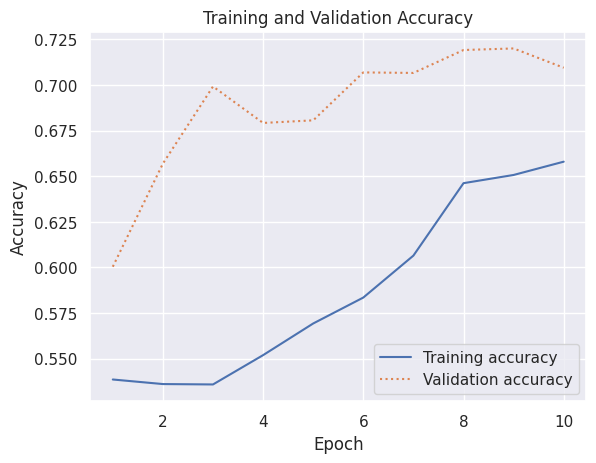

In [80]:
model, hist = run(x_train, y_train, x_test, y_test, hidden=16, drop=True)
confusion_mat(model)
graph(hist)